In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

RANDOM_STATE = 987

In [4]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

data = pd.read_csv('moore.csv', header=None).values

--2021-10-12 14:59:44--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-10-12 14:59:45 (41.2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
data[:10,:]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100],
       [1974, 4500],
       [1974, 8000],
       [1975, 3510],
       [1976, 5000],
       [1976, 8500]])

In [4]:
X = data[:,0].reshape((-1,1))
Y = data[:,1]

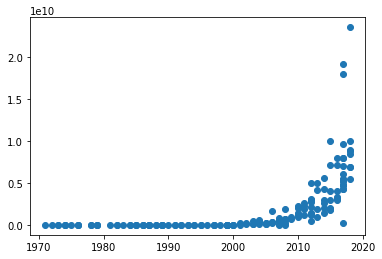

In [5]:
plt.scatter(X,Y);

In [7]:
logY = np.log(Y)

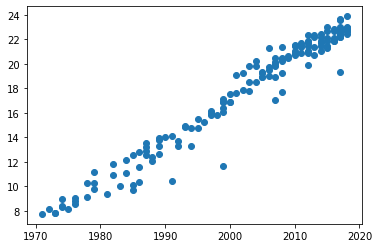

In [8]:
plt.scatter(X,logY)

In [12]:
X = X - X.mean()

In [5]:
model = tf.keras.models.Sequential(layers=[
                                           tf.keras.layers.Input(shape=(1,)),
                                           tf.keras.layers.Dense(units=1)])
def schedule(epoch, learning_rate):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule=schedule)

optimizer = tf.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(x=X, y=logY, epochs=200, callbacks=[scheduler])

NameError: ignored

In [29]:
history.history.keys()

dict_keys(['loss', 'mse'])

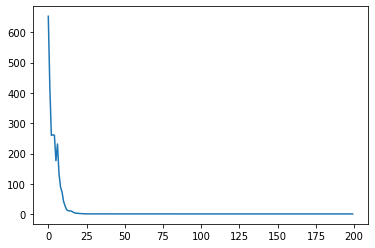

In [32]:
plt.plot(history.history['loss'], label='loss')

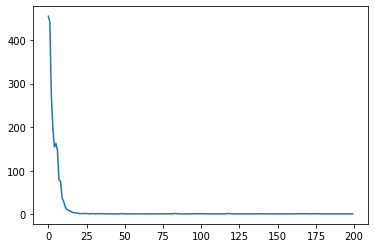

In [26]:
plt.plot(history.history['mse'])

In [35]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3393388]], dtype=float32), array([17.765266], dtype=float32)]


In [37]:
a = model.layers[0].get_weights()[0][0,0]
a

0.3393388

In [38]:
print('Time to double:', np.log(2)/a)

Time to double: 2.042640457448056
